# How well do jobs and skills pay for Data Analysts?

## Methodology

### 1. Evaluate Median salary for top 6 data(3 popular data jobs and their senior roles) jobs
### 2. Find Median salary per skill for Data analysts
### 3. Visualize for highest paying skills and most demanded skills


In [8]:
#Importing required libraries
import ast
import pandas as pd
import numpy as np
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()



#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Filter for countries to include only jobs posted in United States
df_US = df[df['job_country'] == 'United States'].dropna(subset=['salary_year_avg'])



In [5]:
job_title_list = sorted(df_US['job_title_short'].value_counts().index[:6].tolist())

In [8]:
df_US_top6 = df_US[df_US['job_title_short'].isin (job_title_list)]

In [11]:
job_order_list = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order_list

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

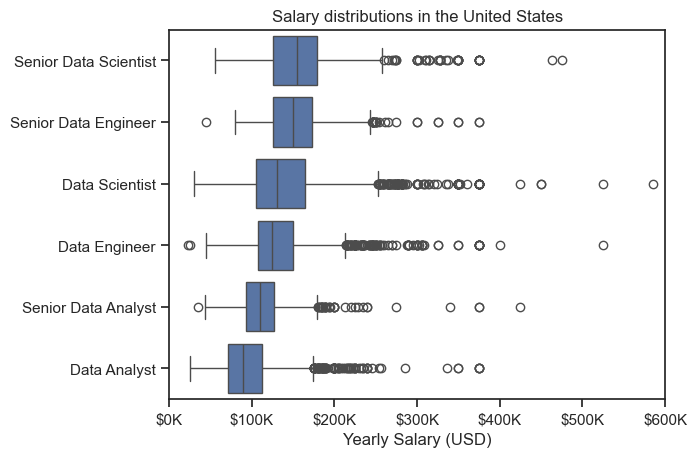

In [12]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order_list)
sns.set_theme(style='ticks')

plt.title('Salary distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Investigate Median Salary VS Skill for Data Analysts

In [9]:
df_US_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [11]:
df_US_DA = df_US_DA.dropna(subset=['salary_year_avg'])

In [17]:
df_US_DA = df_US_DA.explode('job_skills')
df_DA_US_top_pay_skills = df_US_DA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_DA_US_top_pay_skills = df_DA_US_top_pay_skills.head(10)

In [21]:
df_DA_US_popular_skills_pay = df_US_DA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_US_popular_skills_pay = df_DA_US_popular_skills_pay.head(10)
df_DA_US_popular_skills_pay = df_DA_US_popular_skills_pay.sort_values(by='median', ascending=False)


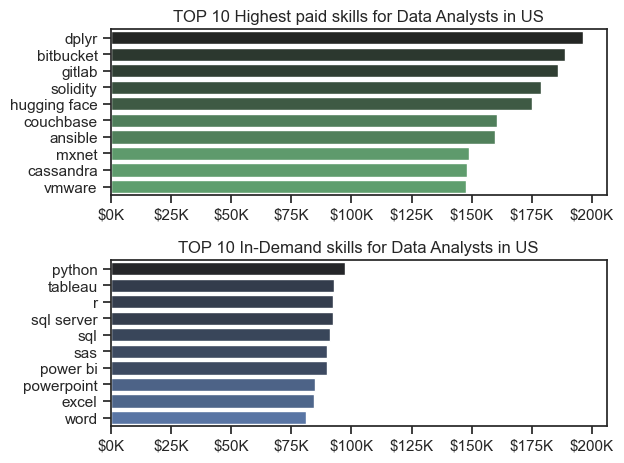

In [29]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')

#visualization for Top 10 highest paid skills for Data Analysts in US
sns.barplot(data=df_DA_US_top_pay_skills, x='median', y=df_DA_US_top_pay_skills.index, hue='median', ax=ax[0], palette='dark:g_r')
ax[0].legend().remove()
ax[0].set_title('TOP 10 Highest paid skills for Data Analysts in US')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_US_popular_skills_pay, x='median', y=df_DA_US_popular_skills_pay.index, hue='median', ax=ax[1], palette='dark:b_r')
ax[1].legend().remove()
ax[1].set_title('TOP 10 In-Demand skills for Data Analysts in US')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.tight_layout()
plt.show()

